# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [28]:
# Business Understanding:
# In this capstone project, I am trying to understand which used car features will
# impact the sell price of used car. We are focus on numeric features,
# including “years” and “odometers” among all used car features to understand if they are correlate to the “price”.
# To address my question, I applied PolynomialFeatures and Lasso in a machine
# learning pipeline to build up a model and use the model to understand the
# relationship between “years”/“odometers”/“years and odometers combination” and  “price”.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display="diagram")


import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
auto_raw = pd.read_csv('/content/vehicles.csv')

In [3]:
auto_raw.info()
auto_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423341 entries, 0 to 423340
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423341 non-null  int64  
 1   region        423341 non-null  object 
 2   price         423341 non-null  int64  
 3   year          422139 non-null  float64
 4   manufacturer  405880 non-null  object 
 5   model         418100 non-null  object 
 6   condition     250397 non-null  object 
 7   cylinders     247267 non-null  object 
 8   fuel          420330 non-null  object 
 9   odometer      418941 non-null  float64
 10  title_status  415114 non-null  object 
 11  transmission  420805 non-null  object 
 12  VIN           263655 non-null  object 
 13  drive         293952 non-null  object 
 14  size          119628 non-null  object 
 15  type          331398 non-null  object 
 16  paint_color   294339 non-null  object 
 17  state         423340 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [15]:
# Data Cleaning
# In data cleaning step, the following process are applied to create cleaned dataset:
# 1. Drop all rows contains ‘NaN’ data;
# 2. Drop all rows with 0 price value;
# 3. Drop all non-numeric features;
# Split cleaned dataset to training and testing dataset.

auto_df = auto_raw.dropna()
auto_df = auto_df[auto_df['price'] != 0]
auto_X = auto_df.drop(['price', 'id', 'VIN', 'region', 'manufacturer', 'model', 'condition', 'state', 'cylinders', 'fuel', 'title_status', 'paint_color', 'drive', 'size', 'type', 'transmission'], axis = 1)
auto_y = auto_df['price']
auto_X_train, auto_X_test, auto_y_train, auto_y_test = train_test_split(auto_X, auto_y,
                                                                       test_size = 0.3,
                                                                       random_state = 42)
auto_X.head(10)

,year,odometer
215,2002.0,155000.0
219,1995.0,110661.0
268,2008.0,56700.0
337,2011.0,164000.0
338,1972.0,88100.0
346,2001.0,20187.0
355,2008.0,129473.0
364,2007.0,181000.0
365,2021.0,19129.0
366,2017.0,94601.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [22]:
# Modeling
# In order to understand the impact factor of used car price, I use
# PolynomialFeatures to introduce years and odometer features and
# Lasso to shrink irrelevant coefficients and leave the most important
# features in the model. Both PolynomialFeatures and Lasso
# are included in a ML pipeline to build model.

auto_pipe = Pipeline([
    ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state = 42))
])
auto_pipe.fit(auto_X_train, auto_y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_

# Answer check
print(type(lasso_coefs))
print(lasso_coefs)
auto_pipe


<class 'numpy.ndarray'>
[-16128.64812102  -6783.80741782  19229.41189397   1058.21999204
   4235.23123575]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.459e+12, tolerance: 3.934e+08
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polyfeatures', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [27]:
predict_price_train = auto_pipe.predict(auto_X_train)
predict_price_test = auto_pipe.predict(auto_X_test)

lasso_train_mse = mean_squared_error(auto_y_train, predict_price_train)
lasso_test_mse = mean_squared_error(auto_y_test, predict_price_test)
print(lasso_train_mse)
print(lasso_test_mse)

143178516.1047595
141530052.83819282


In [26]:
feature_names = auto_pipe.named_steps['polyfeatures'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})

print(type(feature_names))
lasso_df.loc[lasso_df['coef'] != 0]

<class 'numpy.ndarray'>


,feature,coef
0,year,-16128.648121
1,odometer,-6783.807418
2,year^2,19229.411894
3,year odometer,1058.219992
4,odometer^2,4235.231236


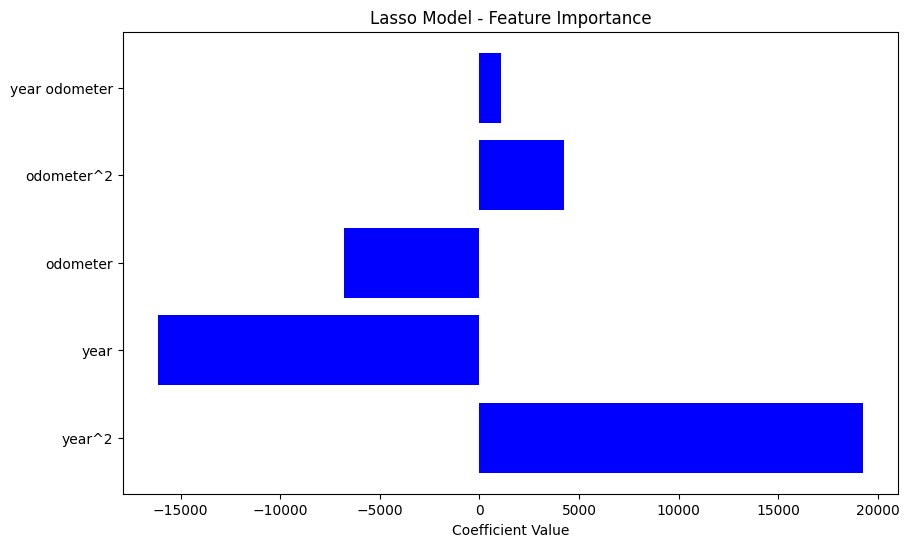

In [29]:
lasso_df['abs_coef'] = lasso_df['coef'].abs()
lasso_df_sorted = lasso_df.sort_values(by='abs_coef', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(lasso_df_sorted['feature'], lasso_df_sorted['coef'], color='b')
plt.xlabel('Coefficient Value')
plt.title('Lasso Model - Feature Importance')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [30]:
# Summery
#1. The ‘year’ or ‘odometer’ feature of used cars are crucial in determining the used car price. Older cars or cars with high milage lead to lower price.
#2. The quadratic terms (year^2 and odometer^2) suggest that the car price decreases with age and mileage, but at a diminishing rate. This may reflect the fact that while a new car depreciates rapidly, older cars stabilize in value once they reach a certain age or mileage.
#3. The ‘year and odometer’ feature indicates that the relationship between car age and mileage is complex. A newer car with high mileage might be priced higher than an older car with the same mileage due to its newer model, despite the mileage.


# Recommendation
# I would recommend used car seller to sell used car when either it has newer year or less milage.
# The seller might be able to target premium buyer for newer cars buyer and target budget buyers for older and high milage car.
# Also, seller is able to consider to apply a better trade-in offer for newer used car and reduce offer for an older or high-milage car.
